## Visualize the Bosch Small Traffic Lights Dataset

The Bosch small traffic lights dataset can be downloaded from here: https://hci.iwr.uni-heidelberg.de/node/6132
The dataset used in this notebook is the RGB dataset

### 1. Import necessary modules

In [33]:
import os, yaml
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.io.json import json_normalize
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

### 2. Load the dataset

In [3]:
#Define path to the dataset and annotation filenames
DATA_FOLDER = os.path.join('.', 'data', 'bosch')
TRAIN_DATA_FOLDER = os.path.join(DATA_FOLDER, 'dataset_train_rgb')
TEST_DATA_FOLDER = os.path.join(DATA_FOLDER, 'dataset_test_rgb')
TRAIN_IMAGE_FOLDER = os.path.join(TRAIN_DATA_FOLDER, 'rgb', 'train')
TEST_IMAGE_FOLDER = os.path.join(TEST_DATA_FOLDER, 'rgb', 'test')
TRAIN_ANNOTATIONS_FILE = os.path.join(TRAIN_DATA_FOLDER, 'train.yaml')
TEST_ANNOTATIONS_FILE = os.path.join(TEST_DATA_FOLDER, 'test.yaml')

In [21]:
#Read in all the image files
train_image_files = glob.glob(os.path.join(TRAIN_IMAGE_FOLDER,'**','*.png'), recursive=True)
test_image_files  = glob.glob(os.path.join(TEST_IMAGE_FOLDER,'*.png'), recursive=True)

#Read in all the annotations
train_annotations = yaml.load(open(TRAIN_ANNOTATIONS_FILE, 'rb').read())
test_annotations = yaml.load(open(TEST_ANNOTATIONS_FILE, 'rb').read())

assert(len(train_image_files) == len(train_annotations)), "Number of training annotations does not match training images!"
assert(len(test_image_files) == len(test_annotations)), "Number of test annotations does not match test images!"

### 3. Explore the data

In [22]:
#Summarize the data
n_train_samples = len(train_annotations)
n_test_samples = len(test_annotations)
sample_train = train_annotations[10]
sample_test = test_annotations[10]
print("Number of training examples: {:d}".format(n_train_samples))
print("Number of test examples: {:d}\n".format(n_test_samples))
print('The annotation files are a {} of {} with the following keys: \n{}\n'
      .format(type(train_annotations).__name__, 
              type(sample_train).__name__, 
              sample_train.keys()))
print('The boxes key has values that are a {} of {} with keys: \n{}\n'
      .format(type(sample_train['boxes']).__name__,
              type(sample_train['boxes'][0]).__name__, 
              sample_train['boxes'][0].keys()))
print('The path key in the training dataset has the following format: \n{}\n'.format(sample_train['path']))
print('The path key in the test dataset has the following format: \n{}\n'.format(sample_test['path']))

Number of training examples: 5093
Number of test examples: 8334

The annotation files are a list of dict with the following keys: 
dict_keys(['boxes', 'path'])

The boxes key has values that are a list of dict with keys: 
dict_keys(['y_max', 'x_max', 'occluded', 'y_min', 'label', 'x_min'])

The path key in the training dataset has the following format: 
./rgb/train/2017-02-03-11-44-56_los_altos_mountain_view_traffic_lights_bag/207544.png

The path key in the test dataset has the following format: 
/net/pal-soc1.us.bosch.com/ifs/data/Shared_Exports/deep_learning_data/traffic_lights/university_run1/24088.png



In [23]:
#Load the data into dataframes to get the unique labels and instances of each label
train_df = pd.io.json.json_normalize(train_annotations)
test_df = pd.io.json.json_normalize(test_annotations)

trainIdx = train_df.set_index(['path']).boxes.apply(pd.Series).stack().index
testIdx = test_df.set_index(['path']).boxes.apply(pd.Series).stack().index

train_df = pd.DataFrame(train_df.set_index(['path'])
                   .boxes.apply(pd.Series).stack().values.tolist(),index=trainIdx).reset_index().drop('level_1',1)
test_df = pd.DataFrame(test_df.set_index(['path'])
                   .boxes.apply(pd.Series).stack().values.tolist(),index=testIdx).reset_index().drop('level_1',1)

In [24]:
print('The training annotations have the following class distributions :\n{}\n'.format(train_df.label.value_counts()))
print('The test annotations have the following class distribution:\n{}\n'.format(test_df.label.value_counts()))

The training annotations have the following class distributions :
Green                 5207
Red                   3057
RedLeft               1092
off                    726
Yellow                 444
GreenLeft              178
GreenStraight           20
GreenRight              13
RedStraight              9
RedRight                 5
GreenStraightRight       3
GreenStraightLeft        1
RedStraightLeft          1
Name: label, dtype: int64

The test annotations have the following class distribution:
Green     7569
Red       5321
off        442
Yellow     154
Name: label, dtype: int64



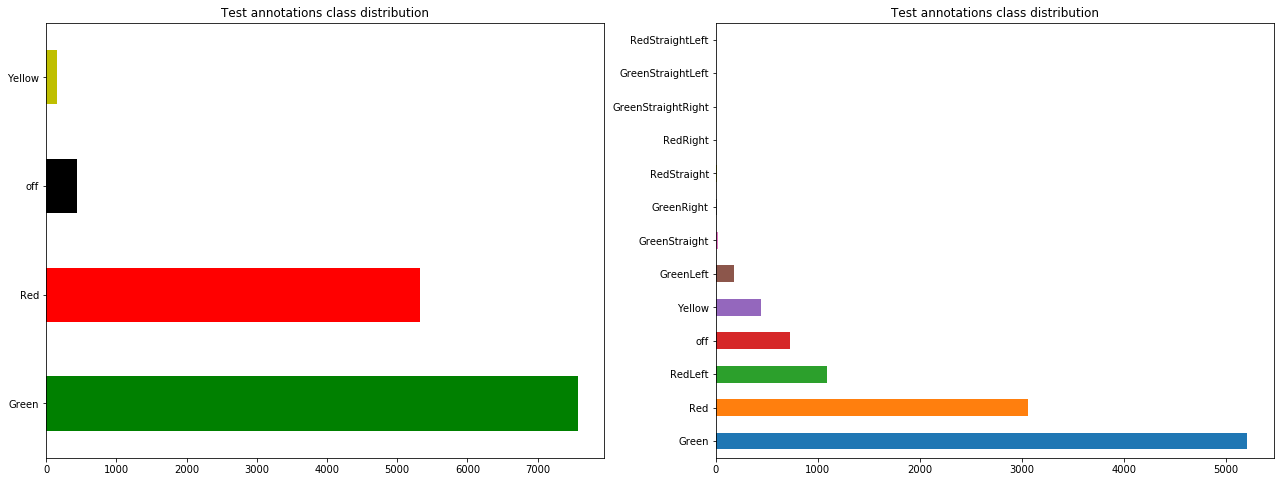

In [25]:
plt.figure(figsize = (22,8))
plt.subplot(1,2,1)
pd.value_counts(test_df['label']).plot(kind='barh', color=['g', 'r', 'k', 'y'])
plt.title('Test annotations class distribution')
plt.subplot(1,2,2)
pd.value_counts(train_df['label']).plot(kind='barh')
plt.title('Test annotations class distribution')
plt.show()

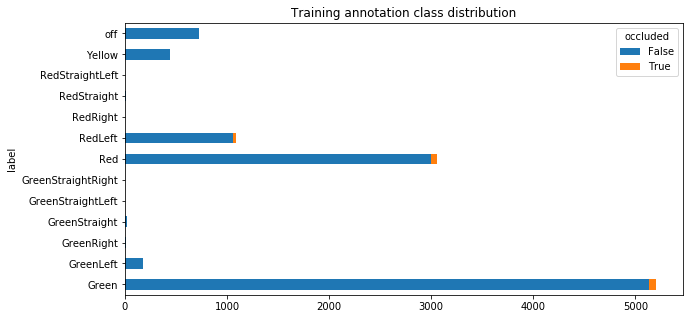

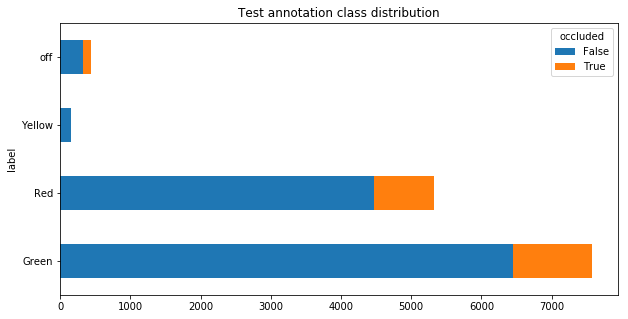

In [26]:
train_df.groupby(['occluded', 'label'])['label'].count().unstack('occluded').plot(kind='barh', stacked=True, figsize=(10,5) )
plt.title('Training annotation class distribution')
test_df.groupby(['occluded', 'label'])['label'].count().unstack('occluded').plot(kind='barh', stacked=True, figsize=(10,5))
plt.title('Test annotation class distribution')
plt.show()